# The Central Limit Theorem and Confidence Intervals

## Sampling

Before we get into a theorem that's related to sampling, we should remember some key things about sampling.

<img src="images/sample_pop.png" alt="sampling example with circled people" width=800>

Our goal when sampling is to find a representative group, from which we can infer population parameters.

Remember: samples have statistics, populations have parameters.

In order to do this effectively, our sample should be randomly selected and representative of our population (which sounds nice and easy, it's hard to do in practice). We are trying to minimize bias in our sample, but also we are sampling because we're trying to minimize cost as well.

## Central Limit Theorem (CLT)

Now here's something cool:

> "The central limit theorem states that the sampling distribution of the mean of any independent, random variable will be normal or nearly normal, if the sample size is large enough." 
- From [Stat Trek](https://stattrek.com/statistics/dictionary.aspx?definition=central_limit_theorem)

Let's look at an example, using the popular Iris dataset:

<img src="images/probability-basics.gif" width=800>

Here, taking samples of 15 flowers at a time and measuring their sepal lengths, we see that the the mean of the samples is normally distributed, where the mean of that normal distribution approximates the population mean. 

The coolest part is - this is true and works almost no matter what the original distribution is! (I say 'almost' because there are exceptions, of course). 

**Know the differences - Population v Sample Terminology**

Characteristics of populations are called *parameters*<br/>
Characteristics of a sample are called *statistics*

<img src="https://media.cheggcdn.com/media/7ac/7ac1a812-3b41-4873-8413-b6a7b8fab530/CL-26481V_image_006.png" width=700>

Let's work through an example to understand this topic better. We grabbed wage and classification information for 11,666 City of Seattle Employees (as of March 2021).

Details: https://data.seattle.gov/City-Business/City-of-Seattle-Wage-Data/2khk-5ukd

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Grabbing Seattle city worker data 
df = pd.read_csv('data/City_of_Seattle_Wage_Data_Mar2021.csv',
                header=0, names=['Department', 'Last Name', 'First Name', 'Job Title', 'Hourly Rate'])

df.head()

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Police Department,Aagard,Lori,Pol Lieut,80.07
1,Police Department,Aakervik,Dag,Pol Ofcr-Detective,60.84
2,Parks & Recreation,Aamot,Allison,Rec Attendant *,17.85
3,Seattle Public Utilities,Aar,Abdimallik,"Civil Engrng Spec,Sr",55.64
4,Parks & Recreation,Aban,Eduardo,"Civil Engr,Sr",62.49


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11666 entries, 0 to 11665
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Department   11666 non-null  object 
 1   Last Name    11666 non-null  object 
 2   First Name   11666 non-null  object 
 3   Job Title    11666 non-null  object 
 4   Hourly Rate  11666 non-null  float64
dtypes: float64(1), object(4)
memory usage: 455.8+ KB


Our hourly rate column is not perfectly normally distributed...

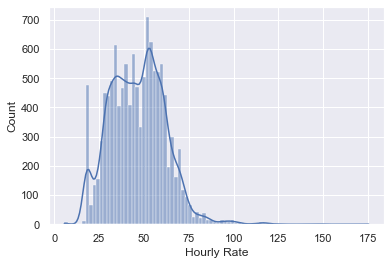

In [4]:
sns.histplot(df['Hourly Rate'], kde=True)
plt.show()

Let's take 100 samples of 50 employees each time, and see what their average hourly rate is:

In [11]:
k = 100 # number of samples
n = 50 # number of employees per sample

# The full for loop version:
# sample_means = []
# for x in range(n):
#     sample_emps = df.sample(n=n)
#     sample_mean = sample_emps['Hourly Rate'].mean()
#     sample_means.append(sample_mean)
    
# But let's do this with list comprehension:
sample_means = [np.mean(df.sample(n=n)['Hourly Rate']) for x in range(k)]

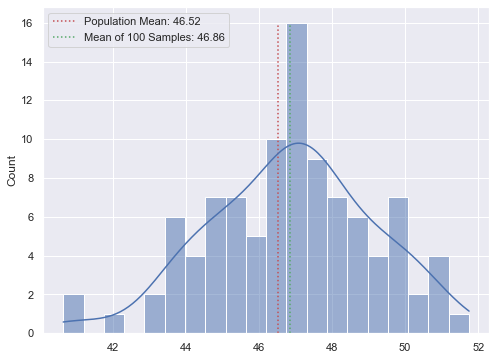

In [12]:
# Plotting the distribution of our samples, plus our pop and sample means
pop_mean = df['Hourly Rate'].mean()
samp_mean = np.mean(sample_means)

plt.figure(figsize=(8,6))

sns.histplot(sample_means, bins=20, kde=True)

plt.vlines(pop_mean, ymin=0, ymax=16 , color='r', linestyle=':',
           label=f'Population Mean: {pop_mean:.2f}')
plt.vlines(samp_mean, ymin=0, ymax=16, color='g', linestyle=':',
           label=f'Mean of 100 Samples: {samp_mean:.2f}')

plt.legend()
plt.show()

## Confidence Intervals

Because sample statistics are imperfect representations of the true population values, it is often appropriate to state these estimates with **confidence intervals**.

Before proceeding, let's talk about how to _interpret_ a confidence interval.

Suppose our Indian correspondent (or David Attenborough) takes several hundred measurements of parrot beak lengths in the Ganges river basin and calculates an average beak length of 9cm. He reports this measure by saying that the 90%-confidence interval is (8.6, 9.4).

This does NOT mean that we should be 90% confident that the true population mean beak length is somewhere between 8.6cm and 9.4cm. Rather, what our correspondent means is that, if we were to conduct the same measuring experiment many times, constructing intervals in the same way, **we should expect 90% of those intervals to contain the true population mean.**

Again, for emphasis: 

> "The **95%** in a **95% confidence interval** tells us that if we calculated a confidence interval from **100** different samples, about **95** of them would contain the **true population mean**."

-- [Crash Course Statistic's video on Confidence Intervals](https://youtu.be/yDEvXB6ApWc)

#### So, how do we calculate them?

The confidence interval we construct will depend on the statistics of our sample. 

The confidence interval will be centered on our sample mean. To construct the endpoints we step out from the center based on the amount of variance allowed by our confidence level.

We decide our confidence level - do we want to be 80% confident? 90%? 95%? 99%? 

Based on what we choose, we can then figure out our **margin of error**.

### Margin of Error

> ### Margin of Error = Critical Value * Sample Standard Error

Let's break down those two component parts:

### Critical Value

First things first - need your alpha ($\alpha$). This is what you set when you pick your confidence level!

$\alpha$ = 1 - Confidence Level

So, if you pick a 95% confidence level, then $\alpha$ = 1 - .95 = .05

BUT because you want to be confident on either side, this actually ends up being divided by 2! .05 / 2 = **.025** This is the percentage of "acceptable" error on either side that you're potentially off by.

Why does this matter? Because you'll feed this value into your search for your true critical value - a value which comes from the cumulative probability up until that point (the point at which theres 2.5% on each of the other sides)

If this is all really vague, just know it's because I don't want to introduce t-tables or z-tables to you just yet - we'll talk about that SO MUCH MORE in the next session.

### Standard Error

The standard error is the standard deviation of the sampling distribution. The issue is that a sample is not an exact replica of the population. We need to account for that in order to make our estimate of the $\mu$ value possible. 

Let's break it down:

**Population standard deviation**

### $\sigma _{x} = \frac{\sigma }{\sqrt{n}}$

* $ \sigma _{x}$ = standard error of $\bar{x} $
* $ \sigma $ = standard deviation of population

**What if we do not know the population standard deviation?** (which is most of the time)

If we do not know the population standard deviation, we can approximate for it with the sample standard deviation, balanced by the sample size

### $\sigma _{x} ≈ \frac{s}{\sqrt{n}}$

- s = sample standard deviation
- n = sample size

## Wrap it up... in Python!

Now that we know the pieces, what we need to calculate in order to understand these pieces, etc - we can just do this in Python.

In [13]:
from scipy import stats

In [14]:
# Let's check out our population parameters
pop_std = np.std(df['Hourly Rate'])

print(f"Population Mean: {pop_mean:.2f}, Population Standard Deviation: {pop_std:.2f}")

Population Mean: 46.52, Population Standard Deviation: 15.46


Now let's take a sample, construct a confidence interval for our sample statistic, and compare!

In [15]:
# Grab a single sample
sample = df.sample(n=n) # Remember, n = 50 employees

In [16]:
sample_mean = np.mean(sample['Hourly Rate'])
sample_std = np.std(sample['Hourly Rate'])

# We can look at these now... but let's explore how much wiggle room we should give

In [17]:
print(f"Sample Mean: {sample_mean:.2f}, Sample Standard Deviation: {sample_std:.2f}")

Sample Mean: 45.20, Sample Standard Deviation: 15.95


### Quick Aside: T-Distribution vs. Normal

![z vs t](images/z_vs_t.png)

If data is mostly normally distributed, we use the true Gaussian normal distribution when: 

- n > 100
- population standard deviation is known

Otherwise, we use the Student's T-Distribution, which has longer tails than a true Gaussian distribution and which accounts for sample size - but, as sample size increases, it looks closer and closer like the true normal distribution.

For our purposes, although we know our 'population' standard deviation, let's use the Student's T since we have less than 50 in our sample.

In [20]:
# Stats library! Calculating our critical value up until our 2.5%

t_value = stats.t.ppf(0.975, n-1) # N-1 shows the 'degrees of freedom'

In [21]:
t_value

2.009575234489209

In [22]:
samp_standard_error = sample_std / (n ** 0.5)

In [29]:
margin_error = t_value * samp_standard_error

interval_min = sample_mean - margin_error
interval_max = sample_mean + margin_error
print(f"95% confident our population mean is between {interval_min:.2f} and {interval_max:.2f}")

95% confident our population mean is between 40.67 and 49.74


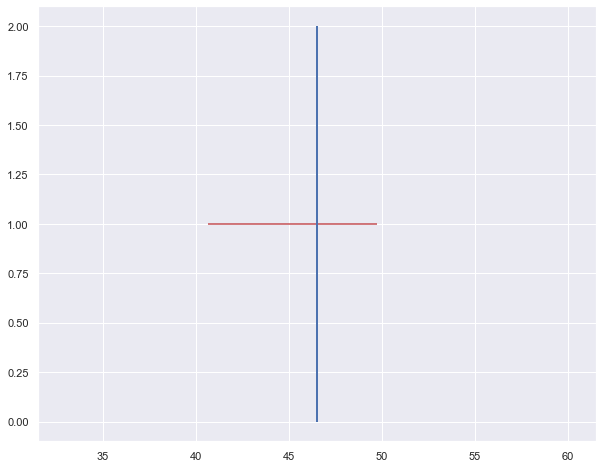

In [24]:
# Now let's see

plt.figure(figsize=(10, 8))
plt.hlines(1, interval_min, interval_max, color='r', label='Sample Confidence Interval')
plt.vlines(pop_mean, 0, 2, lw=2)
plt.xlim(pop_mean-15, pop_mean+15)
plt.show()

Let's interpret: what does this show us?

- Our confidence interval, in this case, captures our underlying population mean!
- It will only do that... 95% of the time 


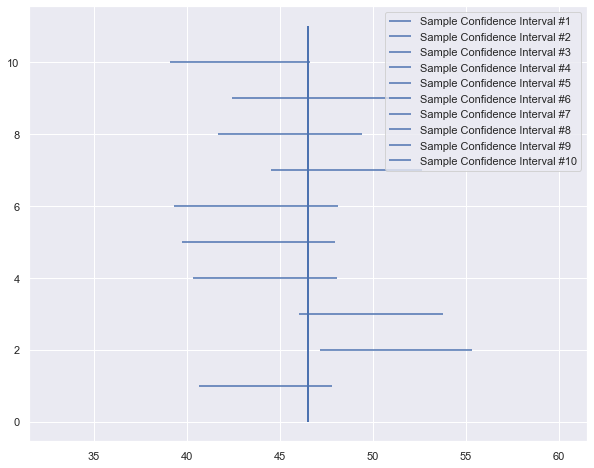

In [25]:
# Now let's do all this for 10 samples!

intervals = []

for x in range(10):
    samp = df.sample(n=n) # Remember, n = 50 employees
    samp_mean = np.mean(samp['Hourly Rate'])
    samp_std = np.std(samp['Hourly Rate'])
    
    samp_sterr = samp_std / (n ** 0.5)
    margin_error = stats.t.ppf(0.975, n-1) * samp_sterr
    int_min = samp_mean - margin_error
    int_max = samp_mean + margin_error
    intervals.append([int_min, int_max])
    
plt.figure(figsize=(10, 8))

for x in range(10):
    plt.hlines(x+1, intervals[x][0], intervals[x][1],  
               label=f'Sample Confidence Interval #{x+1}')
plt.vlines(pop_mean, 0, 11, lw=2)
plt.xlim(pop_mean-15, pop_mean+15)
plt.legend()
plt.show()

Let's interpret - how'd we do?

- Out of 10 intervals, only 1 does not contain the 'population' mean


## One last tidbit... Intervals with the Stats Library!

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html

The interval function is the easiest to use to calculate these, as it will do the math for you assuming you want the interval to account for both tails etc.

Needs:

- Confidence Level
- Degrees of freedom (n-1)
- Sample Mean
- Sample Standard Error

#### First we need the sample standard error:

In [39]:
stats_se = stats.sem(sample['Hourly Rate'], ddof=0) 
# Edit after session: the ddof=0 argument removes the degrees of freedom adjustment

In [40]:
stats_se

2.2558640930805205

#### Now, the interval:

In [35]:
samp_standard_error

2.2558640930805205

In [27]:
sample_mean

45.20405000000001

In [41]:
stats.t.interval(.95, n-1, sample_mean, stats_se)

(40.670721386171934, 49.737378613828085)

In [42]:
margin_error = t_value * samp_standard_error

interval_min = sample_mean - margin_error
interval_max = sample_mean + margin_error
print(f"95% confident our population mean is between {interval_min:.2f} and {interval_max:.2f}")

95% confident our population mean is between 40.67 and 49.74


**Post-session note:**

We had different answers for our standard error calculation - this is because our calculation by hand divided by the squareroot of `n`, and we saw the scipy stats version (the function `sem`) divides by the square root of the degrees of freedom (`n-1`). The Z-distribution version of the formula I have above, with just `n`, is actually not well suited to the fact that we decided to use the Student's T distribution - however, most courses teach using just `n` to calculate the standard error, so we did that. We can adjust to get the same answers both by hand and from the `stats.t.interval` function by adjusting the `ddof` argument in the `sem` function. Watch the video below to help you decide whether you'd like to calculate the interval using `n` or with `n-1`!

Reference: [Khan Academy video on building the intuition behind why taking `n-1` removes bias from our estimate](https://youtu.be/KkaU2ur3Ymw)